# Vector Indexing and Similarity Search (FAISS)

This notebook demonstrates how to use a FAISS index to perform efficient similarity search given a text query. The embeddings are generated using OpenCLIP.

### Load FAISS and Metadata

In [1]:
import faiss
import numpy as np

# Load index and metadata
index = faiss.read_index("../embeddings/image.index")
metadata = np.load("../embeddings/metadata.npy", allow_pickle=True)

### Load OpenCLIP Model for Text Queries

In [3]:
from open_clip import create_model_and_transforms, get_tokenizer
import torch

# Load OpenCLIP model
model, _, preprocess = create_model_and_transforms("ViT-B-32", pretrained="laion2b_s34b_b79k")
device = "cuda" if torch.cuda.is_available() else "cpu"
model = model.to(device).eval()
tokenizer = get_tokenizer('ViT-B-32')

### Encode Text Query to Embedding

In [7]:
# Encode a user query to text embedding
def get_text_embedding(query: str):
    tokens = tokenizer([query])
    with torch.no_grad():
        text_feat = model.encode_text(tokens.to(device))
        
    return text_feat.cpu().numpy().astype("float32")

query = "a dog wearing a hoodie"
text_embedding = get_text_embedding(query)

### Perform Similarity Search with FAISS

In [8]:
# Search top-5 similar images
k = 5
scores, indices = index.search(text_embedding, k)

# Retrieve matching image paths
matches = [metadata[idx] for idx in indices[0]]

### Visualise Results

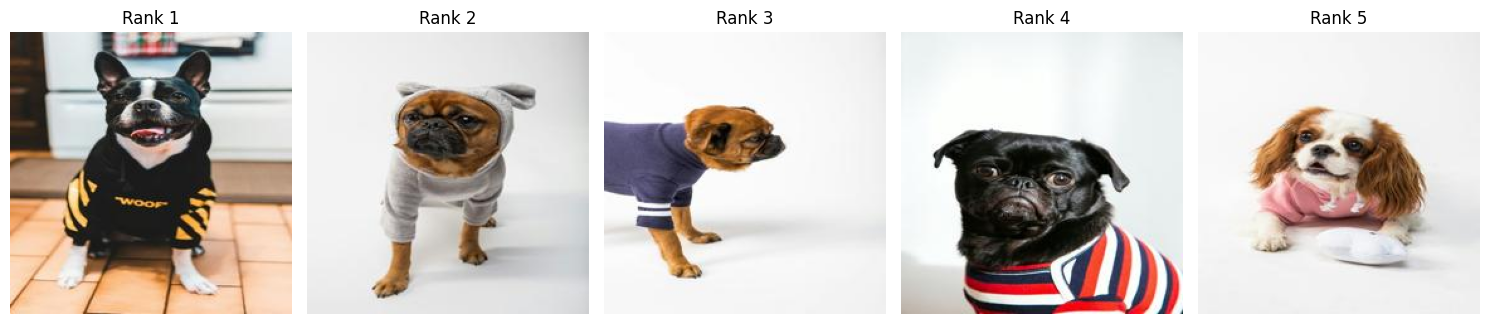

In [9]:
from PIL import Image
import matplotlib.pyplot as plt

# Show images
fig, axs = plt.subplots(1, len(matches), figsize=(15, 5))
for i, img_path in enumerate(matches):
    img_path = "../data/" + img_path
    img = Image.open(img_path)
    axs[i].imshow(img)
    axs[i].set_title(f"Rank {i+1}")
    axs[i].axis("off")
plt.tight_layout()
plt.show()

## Summary

- Loaded saved FAISS index and image metadata.
- Used OpenCLIP to embed natural language queries.
- Retrieved top-K similar images using vector similarity search.
- Visualized the results with matplotlib.